<a href="https://colab.research.google.com/github/degallardo/MCD-PCD/blob/main/Tarea_1_Preprocesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalación de librerias.

In [1]:
!pip install wikipedia
!pip install textnets

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=f9d6ada482163e91e9218040e2fe664109d90cac4a33945b97301a0fbebfcd11
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
     |████████████████████████████████| 118 kB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.2 MB 42.8 MB/s 
     |████████████████████████████████| 1.3 MB 40.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 3.1 MB 25.4 MB/s 
     |████████████████████████████████| 88 kB 5.9 MB/s 
     |████████████████████████████████| 6.0 MB 31.1 MB/s 
     |████████████████████████████████| 457 kB 48.6 MB/s 
     |████████████████████████████████| 660 kB 44.9 MB/s 
     |████████████████████████████████| 10.1 MB 30.7 MB/s 
    

# Cargamos la librería para leer los datos.

In [2]:
import wikipedia as wiki

In [3]:
wiki_topic = wiki.page('Genealogical DNA test')
wiki_topic.title

'Genealogical DNA test'

In [4]:
wiki_topic.content

'A genealogical DNA test is a DNA-based test used in genetic genealogy that looks at specific locations of a person\'s genome in order to find or verify ancestral genealogical relationships, or (with lower reliability) to estimate the ethnic mixture of an individual. Since different testing companies use different ethnic reference groups and different matching algorithms, ethnicity estimates for an individual vary between tests, sometimes dramatically.\nThree principal types of genealogical DNA tests are available, with each looking at a different part of the genome and being useful for different types of genealogical research: autosomal (atDNA), mitochondrial (mtDNA), and Y-DNA.\nAutosomal tests may result in a large number of DNA matches to both males and females who have also tested with the same company. Each match will typically show an estimated degree of relatedness, i.e., a close family match, 1st-2nd cousins, 3rd-4th cousins, etc. The furthest degree of relationship is usually

In [5]:
wiki_topic.images

['https://upload.wikimedia.org/wikipedia/commons/2/2e/Dna-SNP.svg',
 'https://upload.wikimedia.org/wikipedia/commons/2/2b/European_genetic_structure_%28based_on_SNPs%29_PC_analysis.png',
 'https://upload.wikimedia.org/wikipedia/commons/0/04/From_spit_to_DNA-sample.webm',
 'https://upload.wikimedia.org/wikipedia/commons/a/ab/World_map_of_prehistoric_human_migrations.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/3/39/Shared-cM-Relationship-Tree.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/a/ab/World_map_of_prehistoric_human_migrations.jpg',
 'https://upload.wikimedia.org/wikipedia/en/8/8a/OOjs_UI_icon_edit-ltr-progressive.svg',
 'https://upload.wikimedia.org/wikipedia/en/9/96/Symbol_category_class.svg']

In [6]:
wiki_topic.links[:5]

['23andMe', 'Aaron', 'Adam Rutherford', 'Africa', 'African American']

#Limpiamos texto para remover código html o tags.

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(wiki_topic.content)
soup

<html><body><p>A genealogical DNA test is a DNA-based test used in genetic genealogy that looks at specific locations of a person's genome in order to find or verify ancestral genealogical relationships, or (with lower reliability) to estimate the ethnic mixture of an individual. Since different testing companies use different ethnic reference groups and different matching algorithms, ethnicity estimates for an individual vary between tests, sometimes dramatically.
Three principal types of genealogical DNA tests are available, with each looking at a different part of the genome and being useful for different types of genealogical research: autosomal (atDNA), mitochondrial (mtDNA), and Y-DNA.
Autosomal tests may result in a large number of DNA matches to both males and females who have also tested with the same company. Each match will typically show an estimated degree of relatedness, i.e., a close family match, 1st-2nd cousins, 3rd-4th cousins, etc. The furthest degree of relationship

In [9]:
wiki_topic_content = soup.text
wiki_topic_content

'A genealogical DNA test is a DNA-based test used in genetic genealogy that looks at specific locations of a person\'s genome in order to find or verify ancestral genealogical relationships, or (with lower reliability) to estimate the ethnic mixture of an individual. Since different testing companies use different ethnic reference groups and different matching algorithms, ethnicity estimates for an individual vary between tests, sometimes dramatically.\nThree principal types of genealogical DNA tests are available, with each looking at a different part of the genome and being useful for different types of genealogical research: autosomal (atDNA), mitochondrial (mtDNA), and Y-DNA.\nAutosomal tests may result in a large number of DNA matches to both males and females who have also tested with the same company. Each match will typically show an estimated degree of relatedness, i.e., a close family match, 1st-2nd cousins, 3rd-4th cousins, etc. The furthest degree of relationship is usually

#Convertimos todo a minúsculas

In [10]:
wiki_topic_content = wiki_topic.content.lower()
wiki_topic_content

'a genealogical dna test is a dna-based test used in genetic genealogy that looks at specific locations of a person\'s genome in order to find or verify ancestral genealogical relationships, or (with lower reliability) to estimate the ethnic mixture of an individual. since different testing companies use different ethnic reference groups and different matching algorithms, ethnicity estimates for an individual vary between tests, sometimes dramatically.\nthree principal types of genealogical dna tests are available, with each looking at a different part of the genome and being useful for different types of genealogical research: autosomal (atdna), mitochondrial (mtdna), and y-dna.\nautosomal tests may result in a large number of dna matches to both males and females who have also tested with the same company. each match will typically show an estimated degree of relatedness, i.e., a close family match, 1st-2nd cousins, 3rd-4th cousins, etc. the furthest degree of relationship is usually

#Quitamos los números

In [11]:
import re

In [12]:
def remove_numbers(text):
  return re.sub(r'\d+', '', text)

In [13]:
wiki_topic_content = remove_numbers(wiki_topic_content)
wiki_topic_content

'a genealogical dna test is a dna-based test used in genetic genealogy that looks at specific locations of a person\'s genome in order to find or verify ancestral genealogical relationships, or (with lower reliability) to estimate the ethnic mixture of an individual. since different testing companies use different ethnic reference groups and different matching algorithms, ethnicity estimates for an individual vary between tests, sometimes dramatically.\nthree principal types of genealogical dna tests are available, with each looking at a different part of the genome and being useful for different types of genealogical research: autosomal (atdna), mitochondrial (mtdna), and y-dna.\nautosomal tests may result in a large number of dna matches to both males and females who have also tested with the same company. each match will typically show an estimated degree of relatedness, i.e., a close family match, st-nd cousins, rd-th cousins, etc. the furthest degree of relationship is usually the

#Quitamos signos de puntuación
Cuando '\n' aparezca debe reemplazarce con un espacio?

In [14]:
import string

In [15]:
def remove_punctuation(text):
    return text.translate(str.maketrans(' ', ' ', string.punctuation))

In [16]:
wiki_topic_content = remove_punctuation(wiki_topic_content)
wiki_topic_content

'a genealogical dna test is a dnabased test used in genetic genealogy that looks at specific locations of a persons genome in order to find or verify ancestral genealogical relationships or with lower reliability to estimate the ethnic mixture of an individual since different testing companies use different ethnic reference groups and different matching algorithms ethnicity estimates for an individual vary between tests sometimes dramatically\nthree principal types of genealogical dna tests are available with each looking at a different part of the genome and being useful for different types of genealogical research autosomal atdna mitochondrial mtdna and ydna\nautosomal tests may result in a large number of dna matches to both males and females who have also tested with the same company each match will typically show an estimated degree of relatedness ie a close family match stnd cousins rdth cousins etc the furthest degree of relationship is usually the thcousin or further level howe

In [17]:
wiki_topic_content = wiki_topic_content.replace('\n', ' ')
wiki_topic_content

'a genealogical dna test is a dnabased test used in genetic genealogy that looks at specific locations of a persons genome in order to find or verify ancestral genealogical relationships or with lower reliability to estimate the ethnic mixture of an individual since different testing companies use different ethnic reference groups and different matching algorithms ethnicity estimates for an individual vary between tests sometimes dramatically three principal types of genealogical dna tests are available with each looking at a different part of the genome and being useful for different types of genealogical research autosomal atdna mitochondrial mtdna and ydna autosomal tests may result in a large number of dna matches to both males and females who have also tested with the same company each match will typically show an estimated degree of relatedness ie a close family match stnd cousins rdth cousins etc the furthest degree of relationship is usually the thcousin or further level howeve

#Quitamos las stopwords

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [20]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

In [21]:
wiki_topic_content_stopwords = remove_stopwords(wiki_topic_content)
wiki_topic_content_stopwords

['genealogical',
 'dna',
 'test',
 'dnabased',
 'test',
 'used',
 'genetic',
 'genealogy',
 'looks',
 'specific',
 'locations',
 'persons',
 'genome',
 'order',
 'find',
 'verify',
 'ancestral',
 'genealogical',
 'relationships',
 'lower',
 'reliability',
 'estimate',
 'ethnic',
 'mixture',
 'individual',
 'since',
 'different',
 'testing',
 'companies',
 'use',
 'different',
 'ethnic',
 'reference',
 'groups',
 'different',
 'matching',
 'algorithms',
 'ethnicity',
 'estimates',
 'individual',
 'vary',
 'tests',
 'sometimes',
 'dramatically',
 'three',
 'principal',
 'types',
 'genealogical',
 'dna',
 'tests',
 'available',
 'looking',
 'different',
 'part',
 'genome',
 'useful',
 'different',
 'types',
 'genealogical',
 'research',
 'autosomal',
 'atdna',
 'mitochondrial',
 'mtdna',
 'ydna',
 'autosomal',
 'tests',
 'may',
 'result',
 'large',
 'number',
 'dna',
 'matches',
 'males',
 'females',
 'also',
 'tested',
 'company',
 'match',
 'typically',
 'show',
 'estimated',
 'degree',

#Stem words

In [22]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [23]:
stemmer = PorterStemmer()

def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems

In [24]:
wiki_topic_content_stemwords = stem_words(wiki_topic_content)
wiki_topic_content_stemwords

['a',
 'genealog',
 'dna',
 'test',
 'is',
 'a',
 'dnabas',
 'test',
 'use',
 'in',
 'genet',
 'genealog',
 'that',
 'look',
 'at',
 'specif',
 'locat',
 'of',
 'a',
 'person',
 'genom',
 'in',
 'order',
 'to',
 'find',
 'or',
 'verifi',
 'ancestr',
 'genealog',
 'relationship',
 'or',
 'with',
 'lower',
 'reliabl',
 'to',
 'estim',
 'the',
 'ethnic',
 'mixtur',
 'of',
 'an',
 'individu',
 'sinc',
 'differ',
 'test',
 'compani',
 'use',
 'differ',
 'ethnic',
 'refer',
 'group',
 'and',
 'differ',
 'match',
 'algorithm',
 'ethnic',
 'estim',
 'for',
 'an',
 'individu',
 'vari',
 'between',
 'test',
 'sometim',
 'dramat',
 'three',
 'princip',
 'type',
 'of',
 'genealog',
 'dna',
 'test',
 'are',
 'avail',
 'with',
 'each',
 'look',
 'at',
 'a',
 'differ',
 'part',
 'of',
 'the',
 'genom',
 'and',
 'be',
 'use',
 'for',
 'differ',
 'type',
 'of',
 'genealog',
 'research',
 'autosom',
 'atdna',
 'mitochondri',
 'mtdna',
 'and',
 'ydna',
 'autosom',
 'test',
 'may',
 'result',
 'in',
 'a',

#Word Lemmatizer

In [25]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [26]:
lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

In [27]:
wiki_topic_content_lemmatize = lemmatize_word(wiki_topic_content)
wiki_topic_content_lemmatize

['a',
 'genealogical',
 'dna',
 'test',
 'be',
 'a',
 'dnabased',
 'test',
 'use',
 'in',
 'genetic',
 'genealogy',
 'that',
 'look',
 'at',
 'specific',
 'locations',
 'of',
 'a',
 'persons',
 'genome',
 'in',
 'order',
 'to',
 'find',
 'or',
 'verify',
 'ancestral',
 'genealogical',
 'relationships',
 'or',
 'with',
 'lower',
 'reliability',
 'to',
 'estimate',
 'the',
 'ethnic',
 'mixture',
 'of',
 'an',
 'individual',
 'since',
 'different',
 'test',
 'company',
 'use',
 'different',
 'ethnic',
 'reference',
 'group',
 'and',
 'different',
 'match',
 'algorithms',
 'ethnicity',
 'estimate',
 'for',
 'an',
 'individual',
 'vary',
 'between',
 'test',
 'sometimes',
 'dramatically',
 'three',
 'principal',
 'type',
 'of',
 'genealogical',
 'dna',
 'test',
 'be',
 'available',
 'with',
 'each',
 'look',
 'at',
 'a',
 'different',
 'part',
 'of',
 'the',
 'genome',
 'and',
 'be',
 'useful',
 'for',
 'different',
 'type',
 'of',
 'genealogical',
 'research',
 'autosomal',
 'atdna',
 'mit

#Gráfica que muestra las palabras que aparecen mas veces.

In [28]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

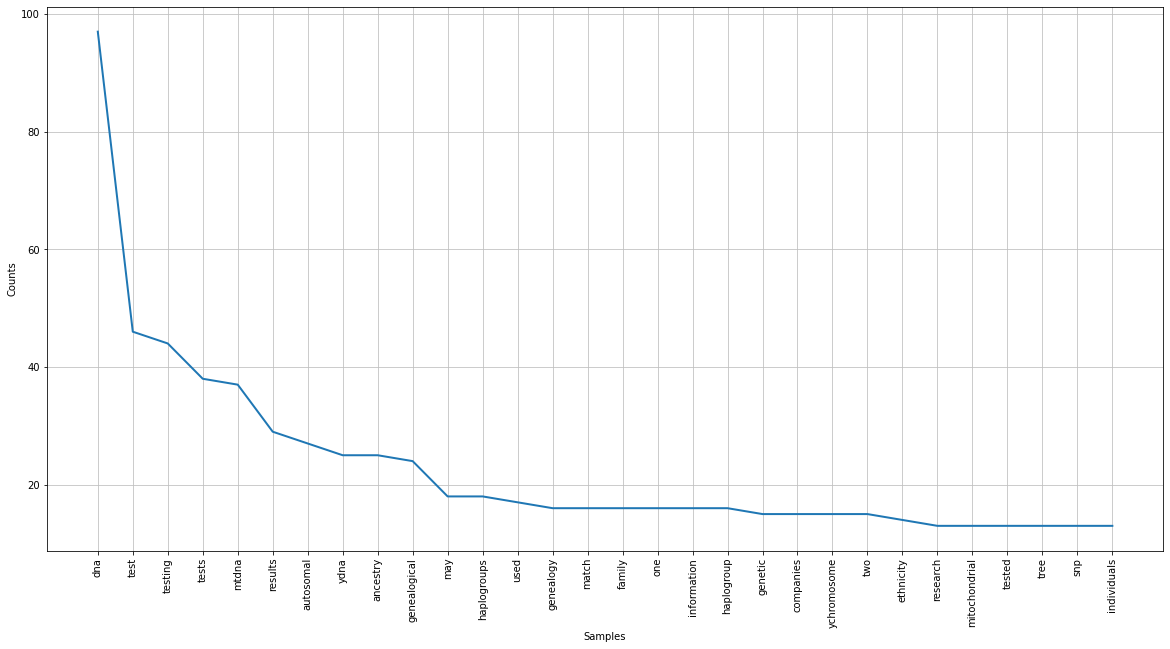

In [29]:
fd = nltk.FreqDist(wiki_topic_content_stopwords)
plt.figure(figsize=(20, 10))
fd.plot(30,cumulative=False)

#Palabras largas

In [30]:
V = set(wiki_topic_content_stopwords)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['communitiesaccording',
 'directtoconsumer',
 'fathertodaughter',
 'greatgrandparent',
 'greatgrandparents',
 'multigenerational',
 'singlenucleotide',
 'subjectsautosomal',
 'surnameautosomal',
 'yscpfctsysczszsz']

In [31]:
from wordcloud import WordCloud, STOPWORDS

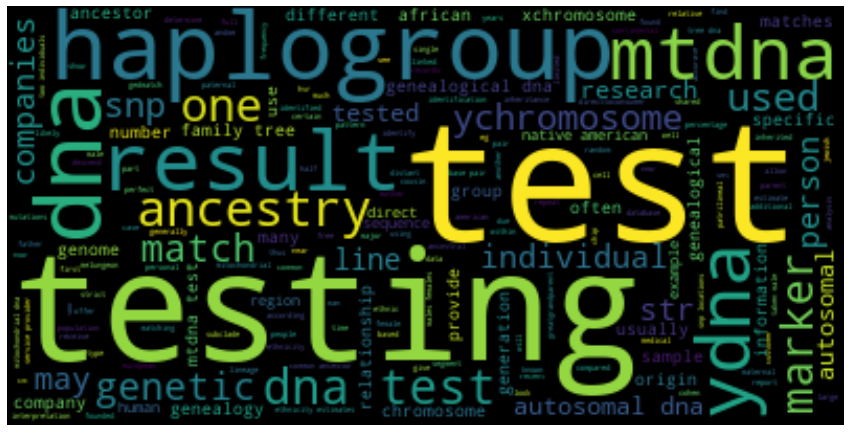

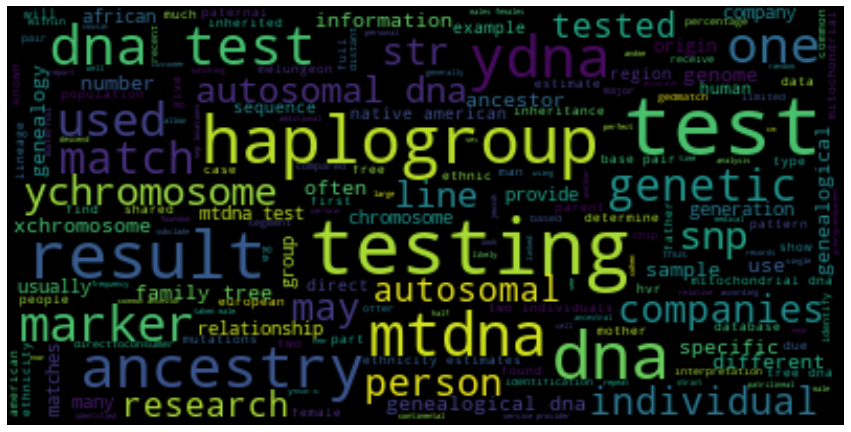

In [32]:
# Generate a word cloud image
wordcloud = WordCloud().generate(wiki_topic_content)

# Display the generated image:
# the matplotlib way:
# import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(wiki_topic_content)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Word Network
https://textnets.readthedocs.io/en/stable/tutorial.html<br>
https://codebox.net/pages/common-english-words-visualisation<br>
Intenté hacer una gráfica de este tipo pero no me alcanzó el tiempo para terminar de entender como hacerla.

In [33]:
import pandas as pd
import textnets as tn
tn.params["autodownload"] = True

In [34]:
wiki_topic_content_stopwords[:5]

['genealogical', 'dna', 'test', 'dnabased', 'test']

In [35]:
pd.Series(wiki_topic.content)

0    A genealogical DNA test is a DNA-based test us...
dtype: object

In [36]:
tn.examples.moon_landing

The Guardian                         3:56 am: Man Steps On to the Moon
New York Times       Men Walk on Moon -- Astronauts Land on Plain, ...
Boston Globe                                         Man Walks on Moon
Houston Chronicle    Armstrong and Aldrich "Take One Small Step for...
Washington Post       The Eagle Has Landed -- Two Men Walk on the Moon
Chicago Tribune      Giant Leap for Mankind -- Armstrong Takes 1st ...
Los Angeles Times    Walk on Moon -- That's One Small Step for Man,...
Name: headlines, dtype: object

/usr/local/lib/python3.7/dist-packages/textnets/corpus.py:94: UserWarning: Language model 'en_core_web_sm' is not yet installed.
  warn(f"Language model '{self.lang}' is not yet installed.")
/usr/local/lib/python3.7/dist-packages/spacy/util.py:841: UserWarning: [W094] Model 'en_core_web_sm' (2.2.5) specifies an under-constrained spaCy version requirement: >=2.2.2. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.2.4,<3.3.0
  warnings.warn(warn_msg)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


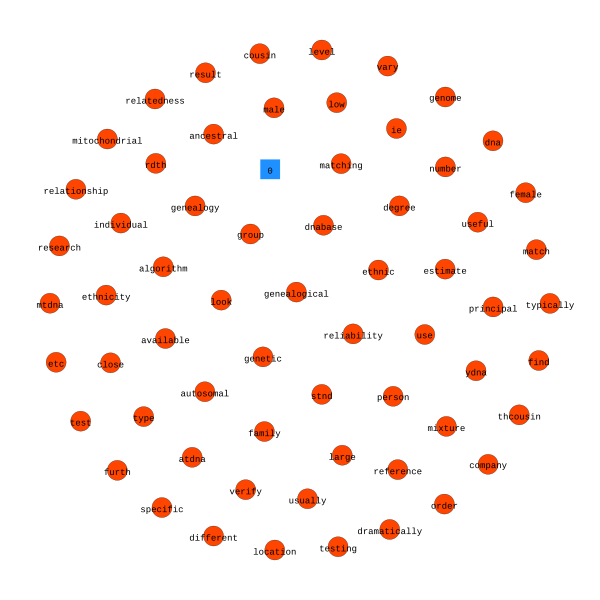

In [37]:
tn.params["seed"] = 42
corpus = tn.Corpus(pd.Series(wiki_topic_content[:1000]))
# corpus = tn.Corpus.from_dict(dict(wiki_topic_content), doc_col="tekst", lang="nl")
t = tn.Textnet(corpus.tokenized(), min_docs=1)
t.plot(label_nodes=True, show_clusters=True)